In [1]:
from platform import python_version

print(python_version())

3.11.9


In [2]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-303ecbat/qc-grader_6af3c9b59af24e17bbf455370fe796dc
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-303ecbat/qc-grader_6af3c9b59af24e17bbf455370fe796dc
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Preparing metadata (setup.py) ... done
  Using cached qiskit-2.1.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-2.1.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.5 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.3
    Uninstalling qiskit-2.0.3:
      Successfully uninstalled qiskit-2.0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import qiskit
import qc_grader

print(f"qiskit version: {qiskit.__version__}")
print(f"grader version: {qc_grader.__version__}")

qiskit version: 2.1.0
grader version: 0.22.9


In [4]:
# saving API key to track progress and having access to quantum computers at IBM

my_api_key = "czckea62oORN6JwhIWqF1o2J-H2lvuoa3_ZiHTm849k6"
my_crn_key = "crn:v1:bluemix:public:quantum-computing:us-east:a/93ca82e55ebd4cd1b800740b8ba22e06:60d6953e-e4fc-4890-9165-5179d5182d85::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=my_api_key,
    instance=my_crn_key,
    name="qgss-2025",
    overwrite=True
)

In [5]:
# Check if account has been saved properly

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'czckea62oORN6JwhIWqF1o2J-H2lvuoa3_ZiHTm849k6',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/93ca82e55ebd4cd1b800740b8ba22e06:60d6953e-e4fc-4890-9165-5179d5182d85::',
  'verify': True,
  'private_endpoint': False}}

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

In [1]:
# Creating a new circuit with a single qubit
qc = QuantumCircuit(2)
# add an H gate to qubit 0
qc.h(0)
# add a CNOT gate to qubit 1
qc.cx(0, 1)
#return a drawing of the circuit
qc.draw("mpl")

NameError: name 'QuantumCircuit' is not defined

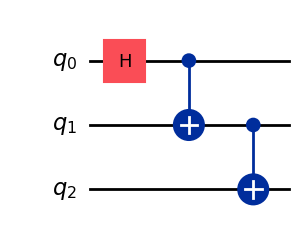

In [8]:
# Create a new quantum circuit with three qubits
qc = QuantumCircuit(3)

# add an H gate to qubit 0
qc.h(0)

#add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)

#return a drawing of the circuit
qc.draw("mpl")

In [9]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


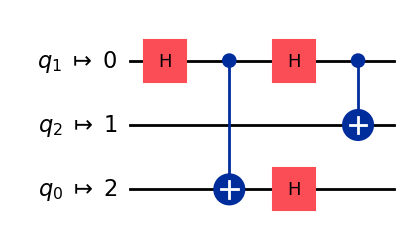

In [14]:
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1],[0, 2]]

# Transpile the quantum circuit `qc` using the `generate_preset_pass_manager` function and the `coupling_map` list
pm = generate_preset_pass_manager(
    optimization_level=1,
    coupling_map=coupling_map
)

qc_transpiled = pm.run(qc)
# draw the quantum circuit
qc_transpiled.draw("mpl")

In [15]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [18]:
# add measurements operation
qc.measure_all()

# set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# get the results
results_sampler = job.result()

In [19]:
# Set up the Estimator
estimator = Estimator(mode=backend)

#Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to the estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the result
results_estimator = job.result()

 Outcomes: {'000': 516, '111': 508}


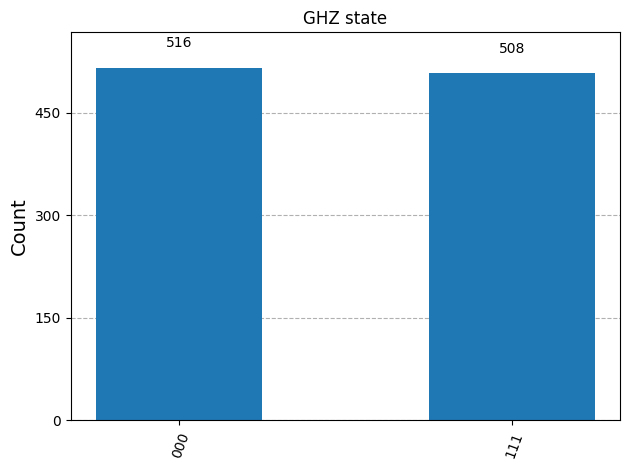

In [23]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f" Outcomes: {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.0263671875)), ('ZZX', np.float64(0.01611328125)), ('ZII', np.float64(0.00830078125)), ('XXI', np.float64(-0.0205078125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


<function matplotlib.pyplot.show(close=None, block=None)>

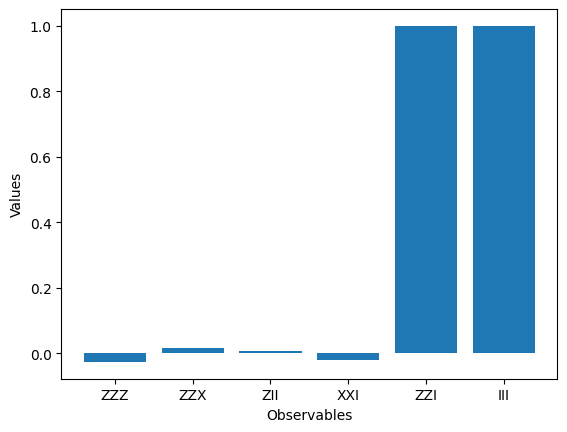

In [25]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# set up plot
container = plt.bar(observables_list, exp_values, width=0.8)

# label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show

In [1]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1544 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 734 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
